# Analysis Stack Overflow Survey Result for 2023

# Project Goal

At what industries do developers get paid the most?

percentage of people who are working remote

How does work experience affect the level of pay?

Most popular Educational Level


# Steps Taken in the Project:

1.Import the datset and relevant libraries

2.Detect missing data in the datasets

3.Plot the a barchart of missing data

4.use a barchart to visually explain the most paid industry

5.represent the precentage of people who are working remote on a piechart

6.plot a barchart showing the level of how working experience affect pay

7.show the popular level of education



# Data Processing:

# Importing Library

In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
#importing the datasets
df = pd.read_csv('C:\\Users\\USER\\Downloads\\survey_results_public.csv')

In [3]:
df.head(20)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,1-2 times a week,3-5 times a week,1-2 times a week,Less than 15 minutes a day,15-30 minutes a day,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development...",Appropriate in length,Easy,135000.0
7,8,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,60-120 minutes a day,30-60 minutes a day,None of these,Financial Services,NaN,NaN,80000.0
8,9,I agree,"I am not primarily a developer, but I write co...",45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Online Courses or Certification;On the job tra...

In [4]:
print ("Number of rows    :",df.shape[0])
print ("Number of columns :",df.shape[1])

Number of rows    : 89184
Number of columns : 84


In [5]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


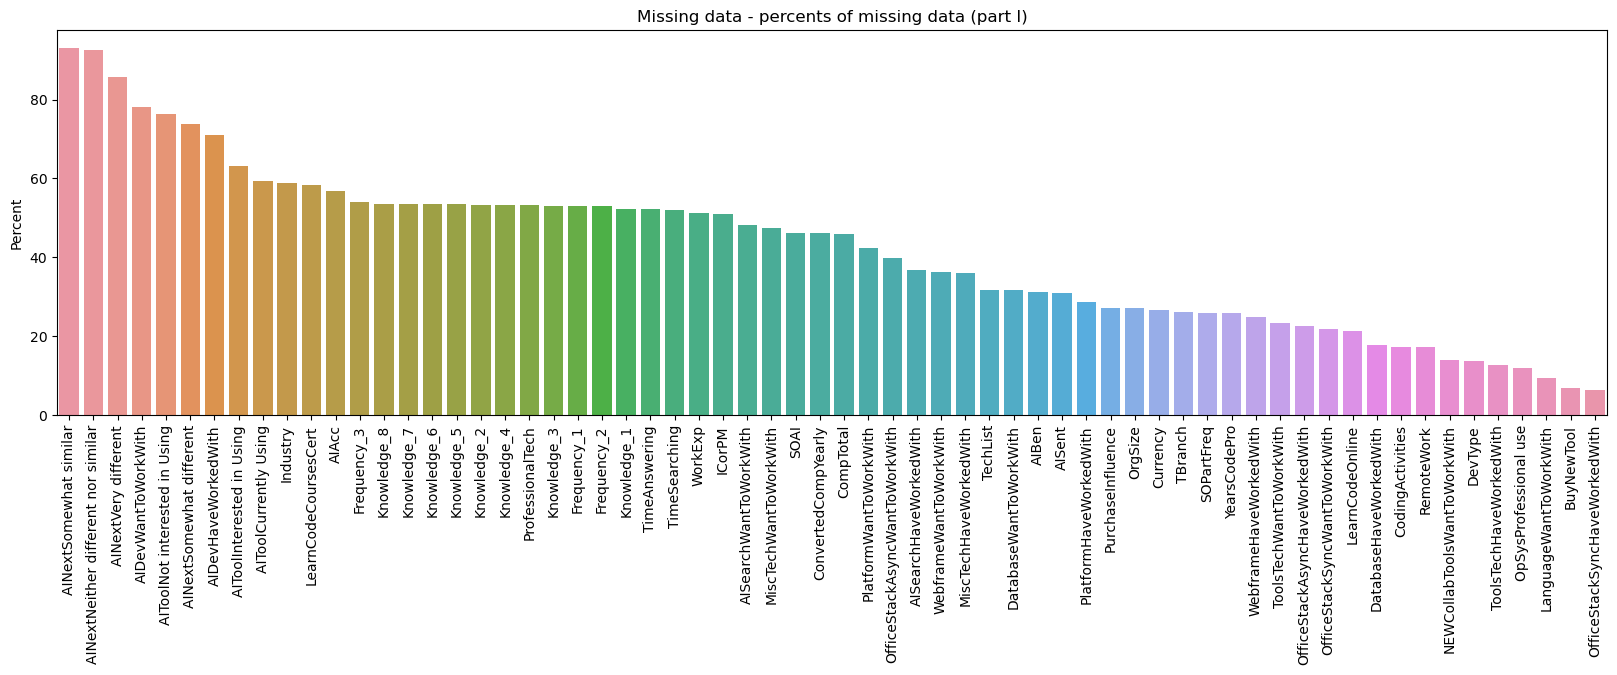

In [6]:
#representing the missing data on a barchart
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
tmp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def plot_missing_data(start, end, text):
    tmp1 = tmp[start:end]
    plt.figure(figsize = (20,5))
    plt.title('Missing data - percents of missing data (part %s)' % text)
    s = sns.barplot(x=tmp1.index,y=tmp1['Percent'])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()    
    

plot_missing_data(1,65,"I")

In [7]:
#print the column with null set
print(df.isnull().sum())

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64


In [8]:
#how many total missing values do we have?
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(total_missing, 'have missing values')

# percent of data that is missing
print((total_missing/total_cells) * 100, '% of Missing Values in Survey Results Public')

2516018 have missing values
33.585166888786375 % of Missing Values in Survey Results Public


In [9]:
# checking missing data in each survey results public column
total_missing = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_survey_results_public = pd.concat([total_missing, percentage], axis=1,
                                          keys=['Total Missing (Column-wise)', 'Percentage (%)'])
missing_survey_results_public.head()

,Total Missing (Column-wise),Percentage (%)
AINextVery similar,86563,97.061132
AINextSomewhat similar,82946,93.005472
AINextNeither different nor similar,82585,92.600691
AINextVery different,76523,85.803507
AIDevWantToWorkWith,69597,78.037540


# At what industries do developers get paid the most?

In [10]:
print(df.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [11]:
grouped_data = df.groupby('Industry')['ConvertedCompYearly'].sum()

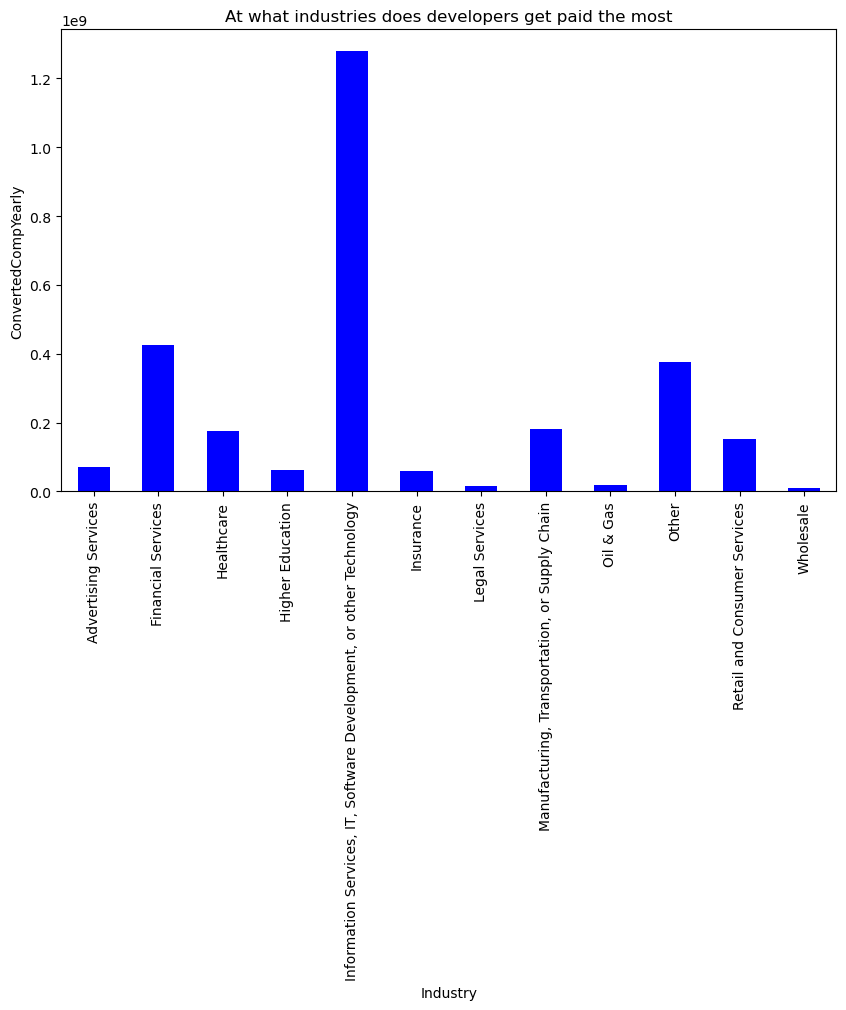

In [12]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Create the bar chart
grouped_data.plot(kind='bar', color='blue')

# Add labels and a title
plt.xlabel('Industry')
plt.ylabel('ConvertedCompYearly')
plt.title('At what industries does developers get paid the most')

# Show the bar chart
plt.show()


Information services, IT, Software Development or other Technology is the highest paid industry 

# percentage of people who are working remote

In [13]:
category_counts = df['RemoteWork'].value_counts()

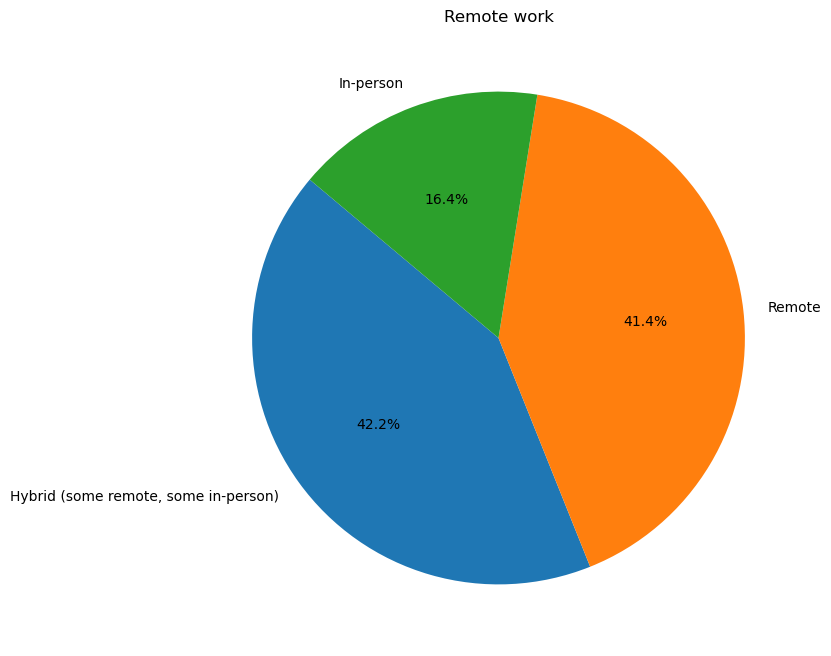

In [14]:
plt.figure(figsize=(8, 8))  # Set the figure size (optional)

# Plot the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title (optional)
plt.title('Remote work')

# Display the pie chart
plt.show()

42.2% of people prefer to work as an hybrid worker while 41.4% of people prefer to work as solely remote, and 16.4% prefer to work in person

# How does coding experience affect the level of pay?

In [15]:
grouped_data = df.groupby('WorkExp')['ConvertedCompYearly'].sum()

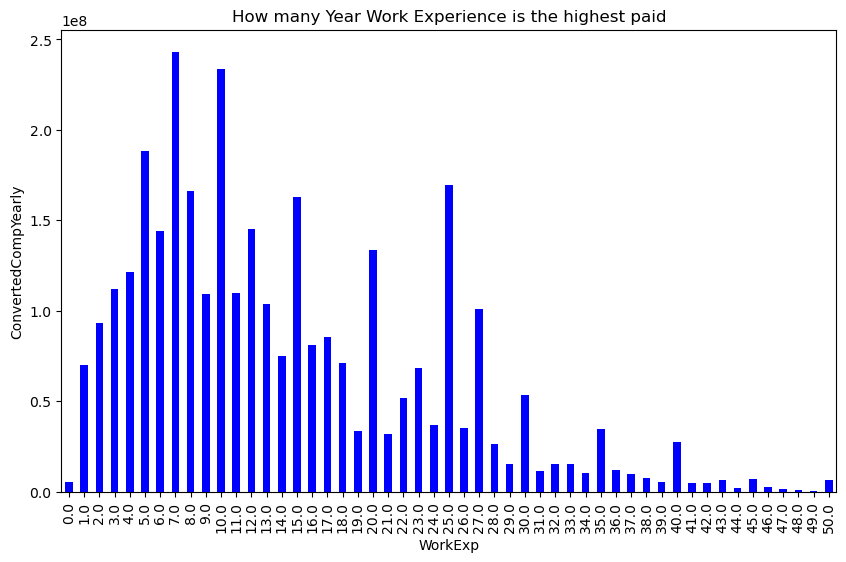

In [16]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Create the bar chart
grouped_data.plot(kind='bar', color='blue')

# Add labels and a title
plt.xlabel('WorkExp')
plt.ylabel('ConvertedCompYearly')
plt.title('How many Year Work Experience is the highest paid')

# Show the bar chart
plt.show()

7 years Work Experience is the highest paid 

# Most popular Educational Level 

In [17]:
category_counts = df['EdLevel'].value_counts()

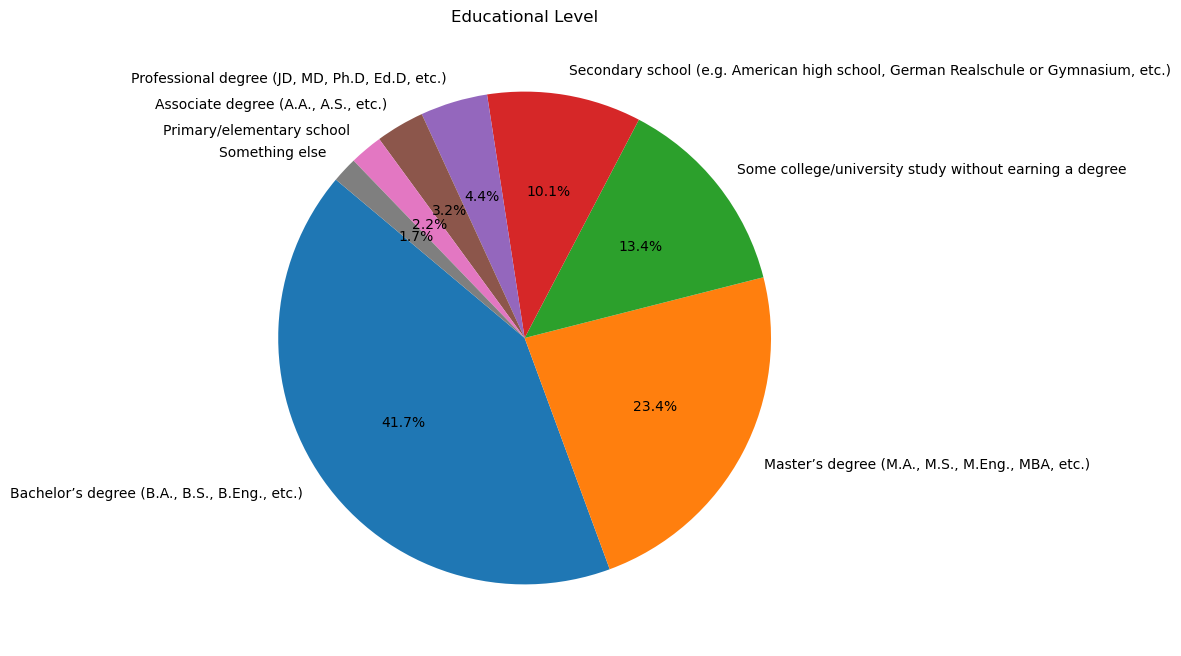

In [18]:
plt.figure(figsize=(8, 8))  # Set the figure size (optional)

# Plot the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title (optional)
plt.title('Educational Level')

# Display the pie chart
plt.show()